In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv("../input/insurance-dataset/Insurance cross sell.csv")
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


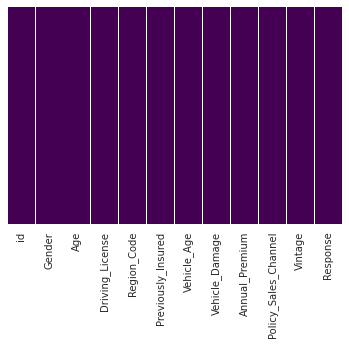

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
sns.set_style('whitegrid')

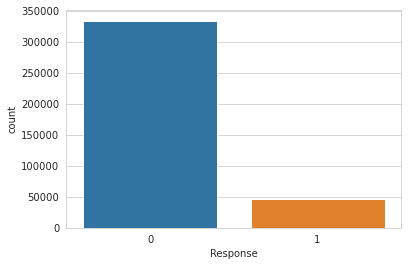

In [ ]:
sns.countplot(x='Response',data=data)

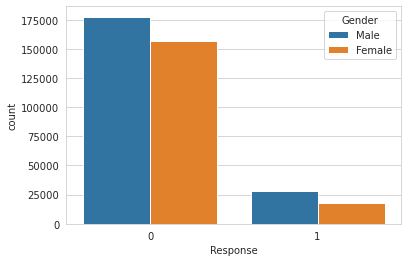

In [ ]:
sns.countplot(x='Response',hue='Gender',data=data)

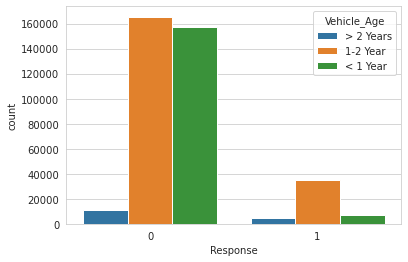

In [ ]:
sns.countplot(x='Response',hue='Vehicle_Age',data=data)

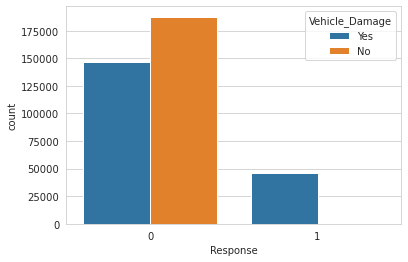

In [ ]:
sns.countplot(x='Response',hue='Vehicle_Damage',data=data)

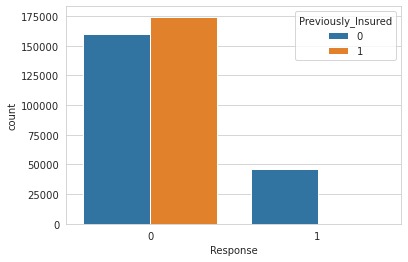

In [ ]:
sns.countplot(x='Response',hue='Previously_Insured',data=data)

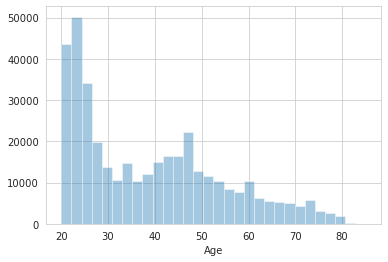

In [ ]:
sns.distplot(data['Age'].dropna(),kde=False,bins=30)

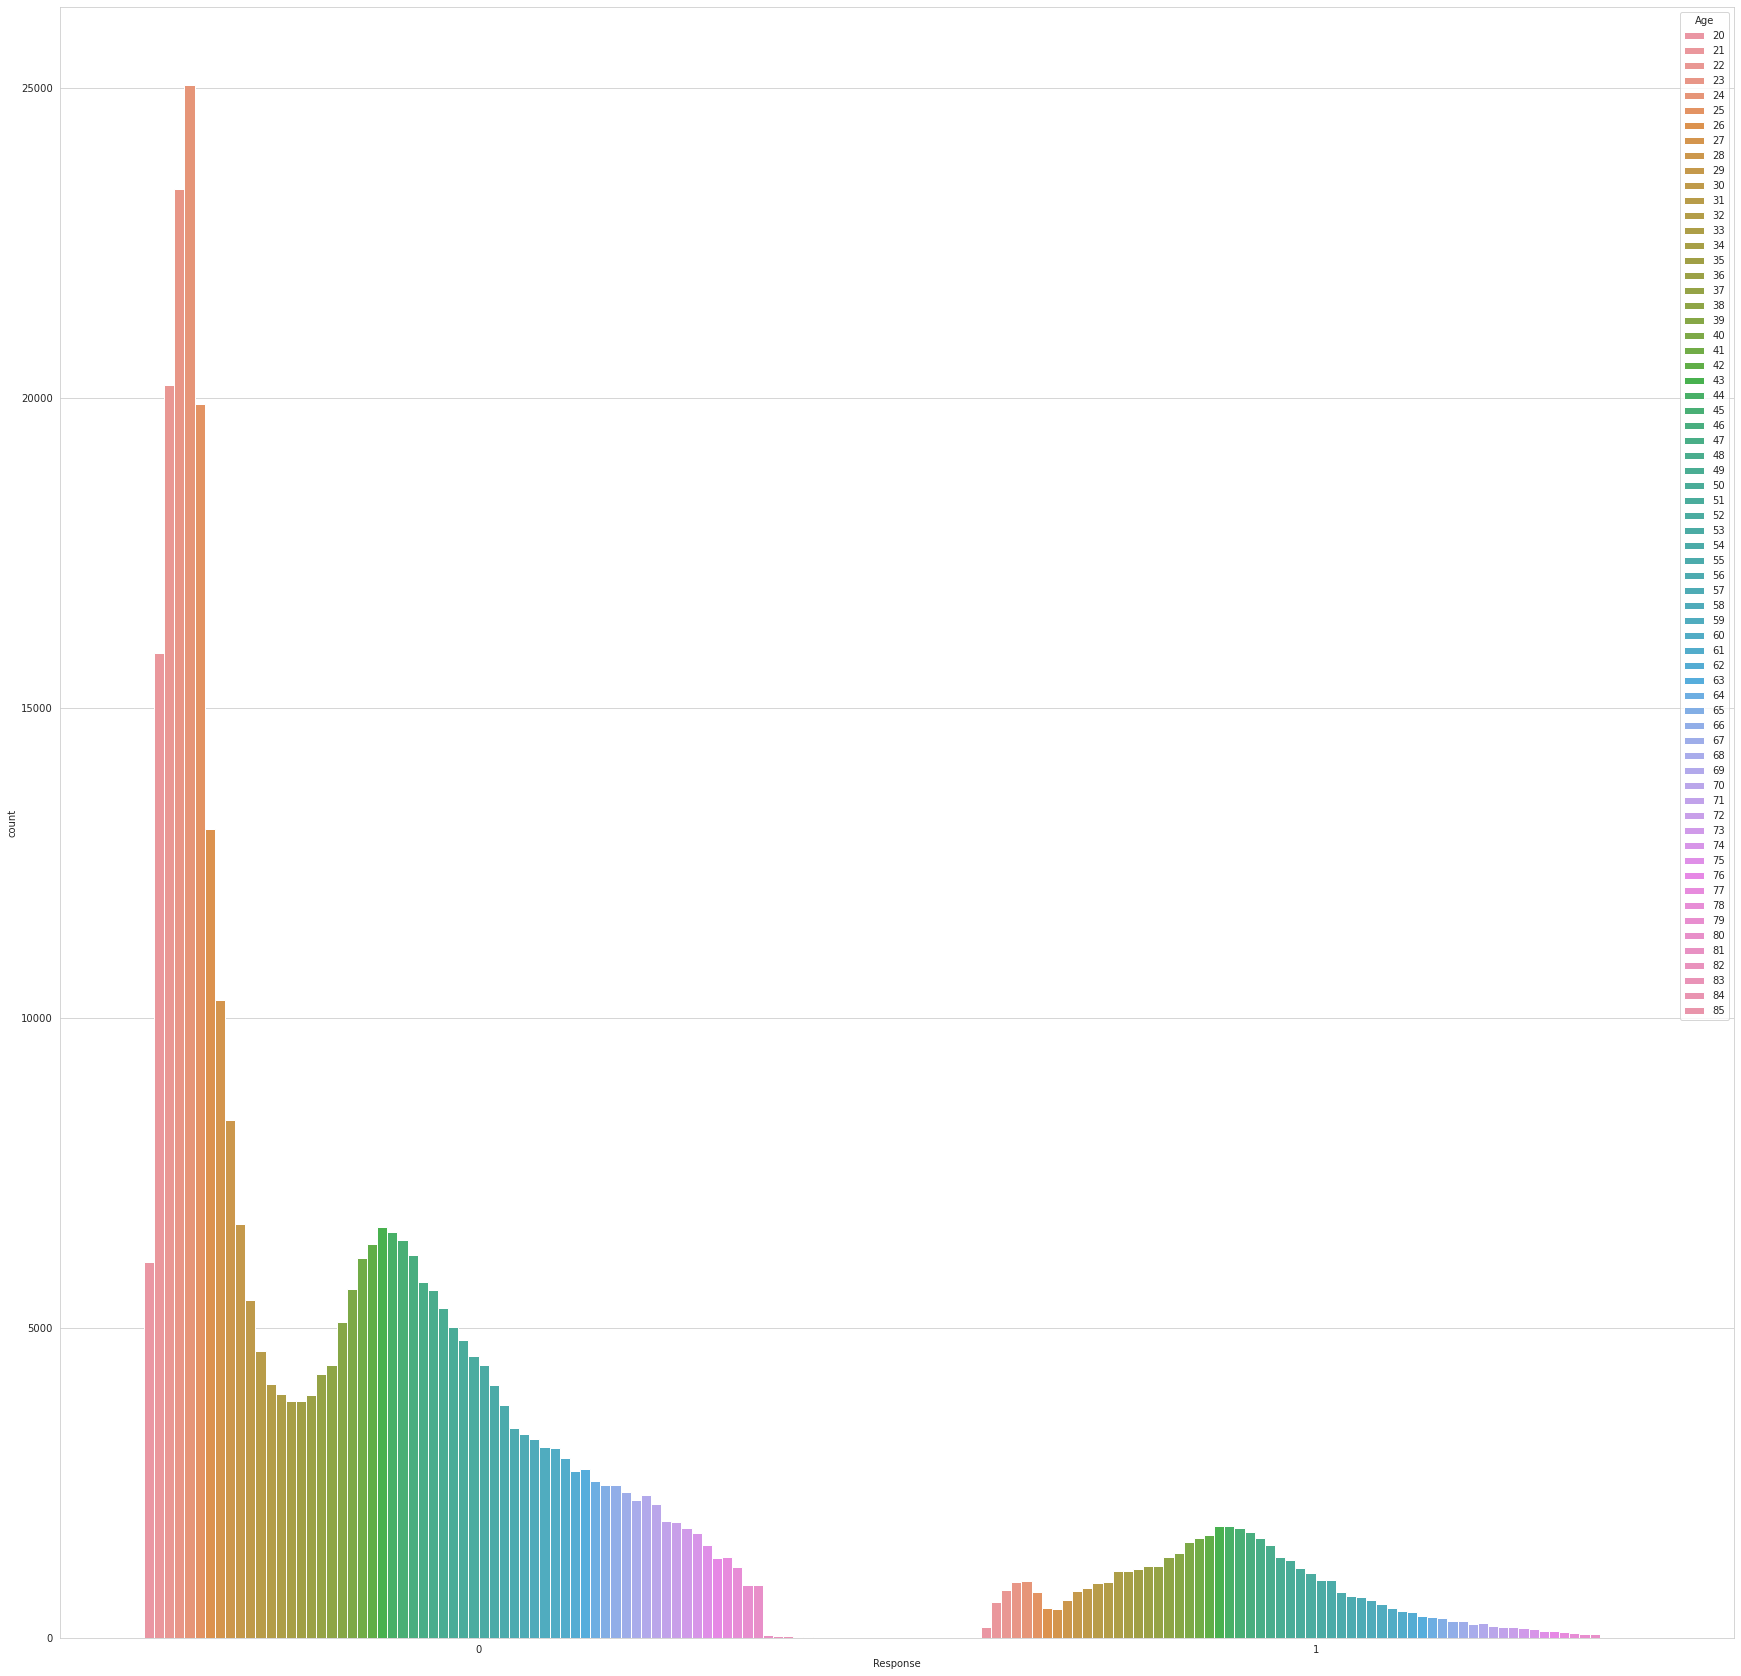

In [ ]:
plt.figure(figsize=(30,30))
sns.countplot(x='Response',hue='Age',data=data)

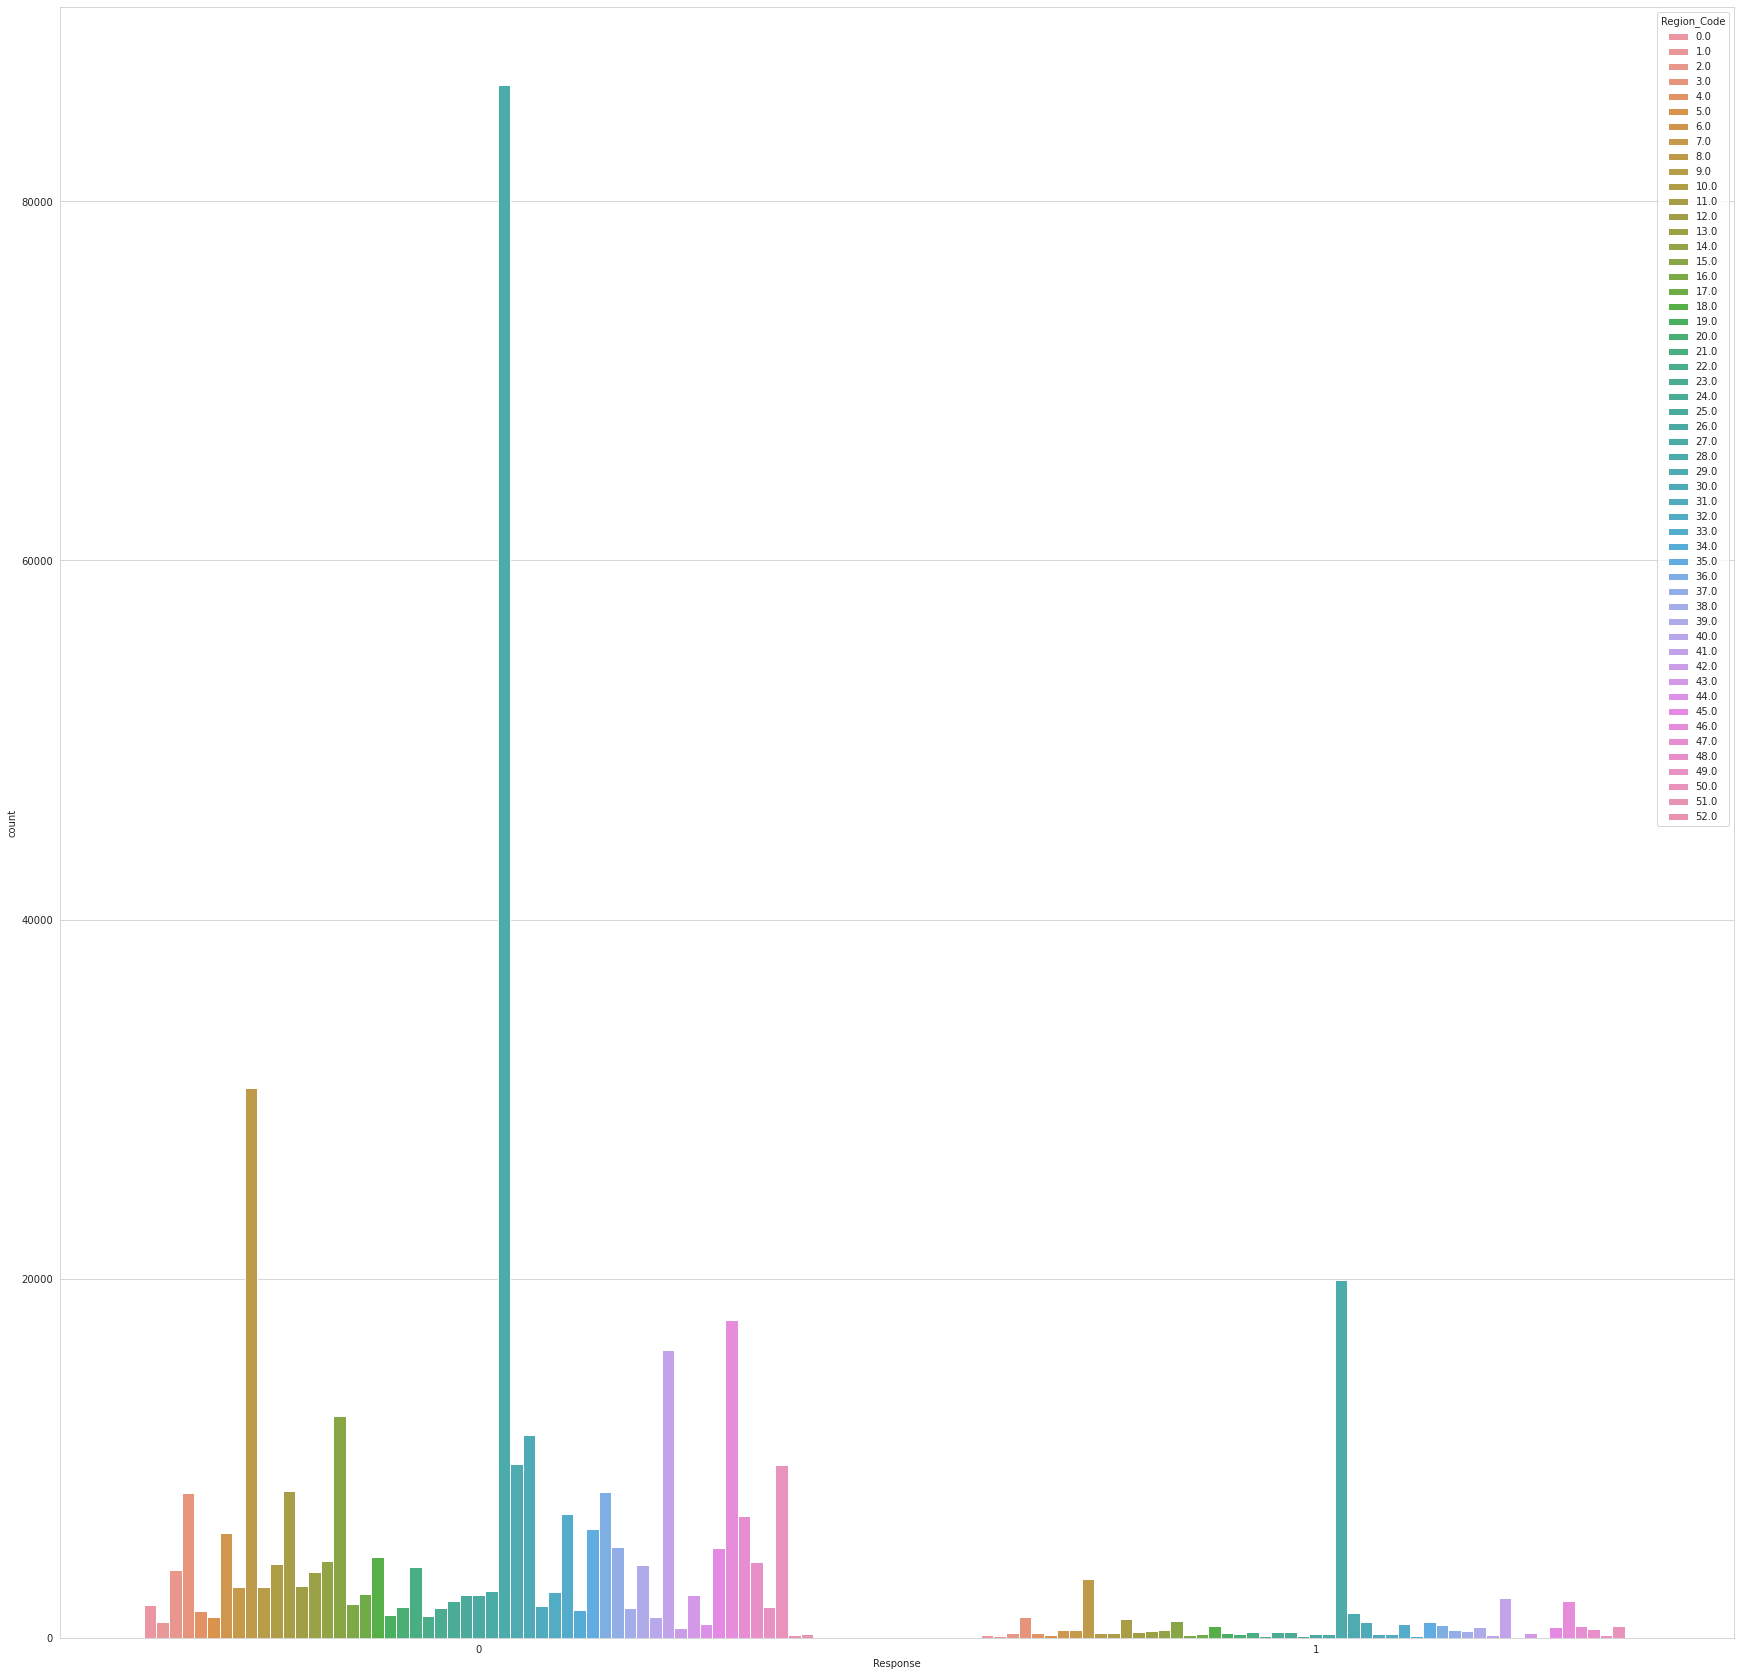

In [ ]:
plt.figure(figsize=(30,30))

sns.countplot(x='Response',hue='Region_Code',data=data)

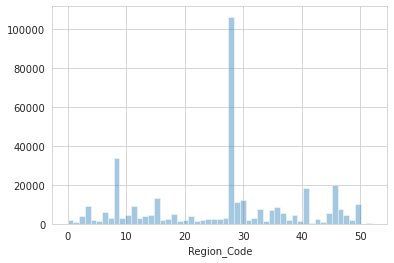

In [ ]:
sns.distplot(data['Region_Code'].dropna(),kde=False,bins=53)


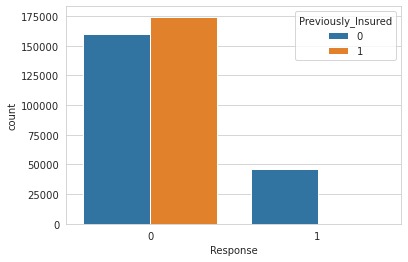

In [ ]:
sns.countplot(x='Response',hue='Previously_Insured',data=data)

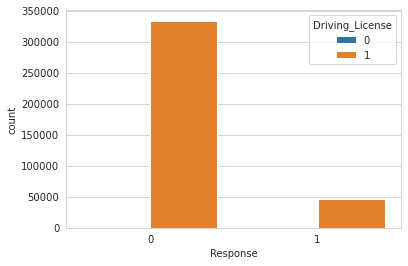

In [ ]:
sns.countplot(x='Response',hue='Driving_License',data=data)

In [ ]:
df_task1=data.loc[:,['Region_Code','Annual_Premium']]

In [ ]:
grouped_df=df_task1.groupby('Region_Code')

In [ ]:
grouped_df.head()

,Region_Code,Annual_Premium
0,28.0,40454.0
1,3.0,33536.0
2,28.0,38294.0
3,11.0,28619.0
4,41.0,27496.0
...,...,...
13436,51.0,49781.0
14134,52.0,2630.0
14238,52.0,36194.0
14307,52.0,24641.0


In [ ]:
grouped_mean=grouped_df.mean()
grouped_mean=grouped_mean.reset_index()

In [ ]:
grouped_mean.sort_values('Annual_Premium',axis=0,na_position='last',inplace=True,ascending=False)

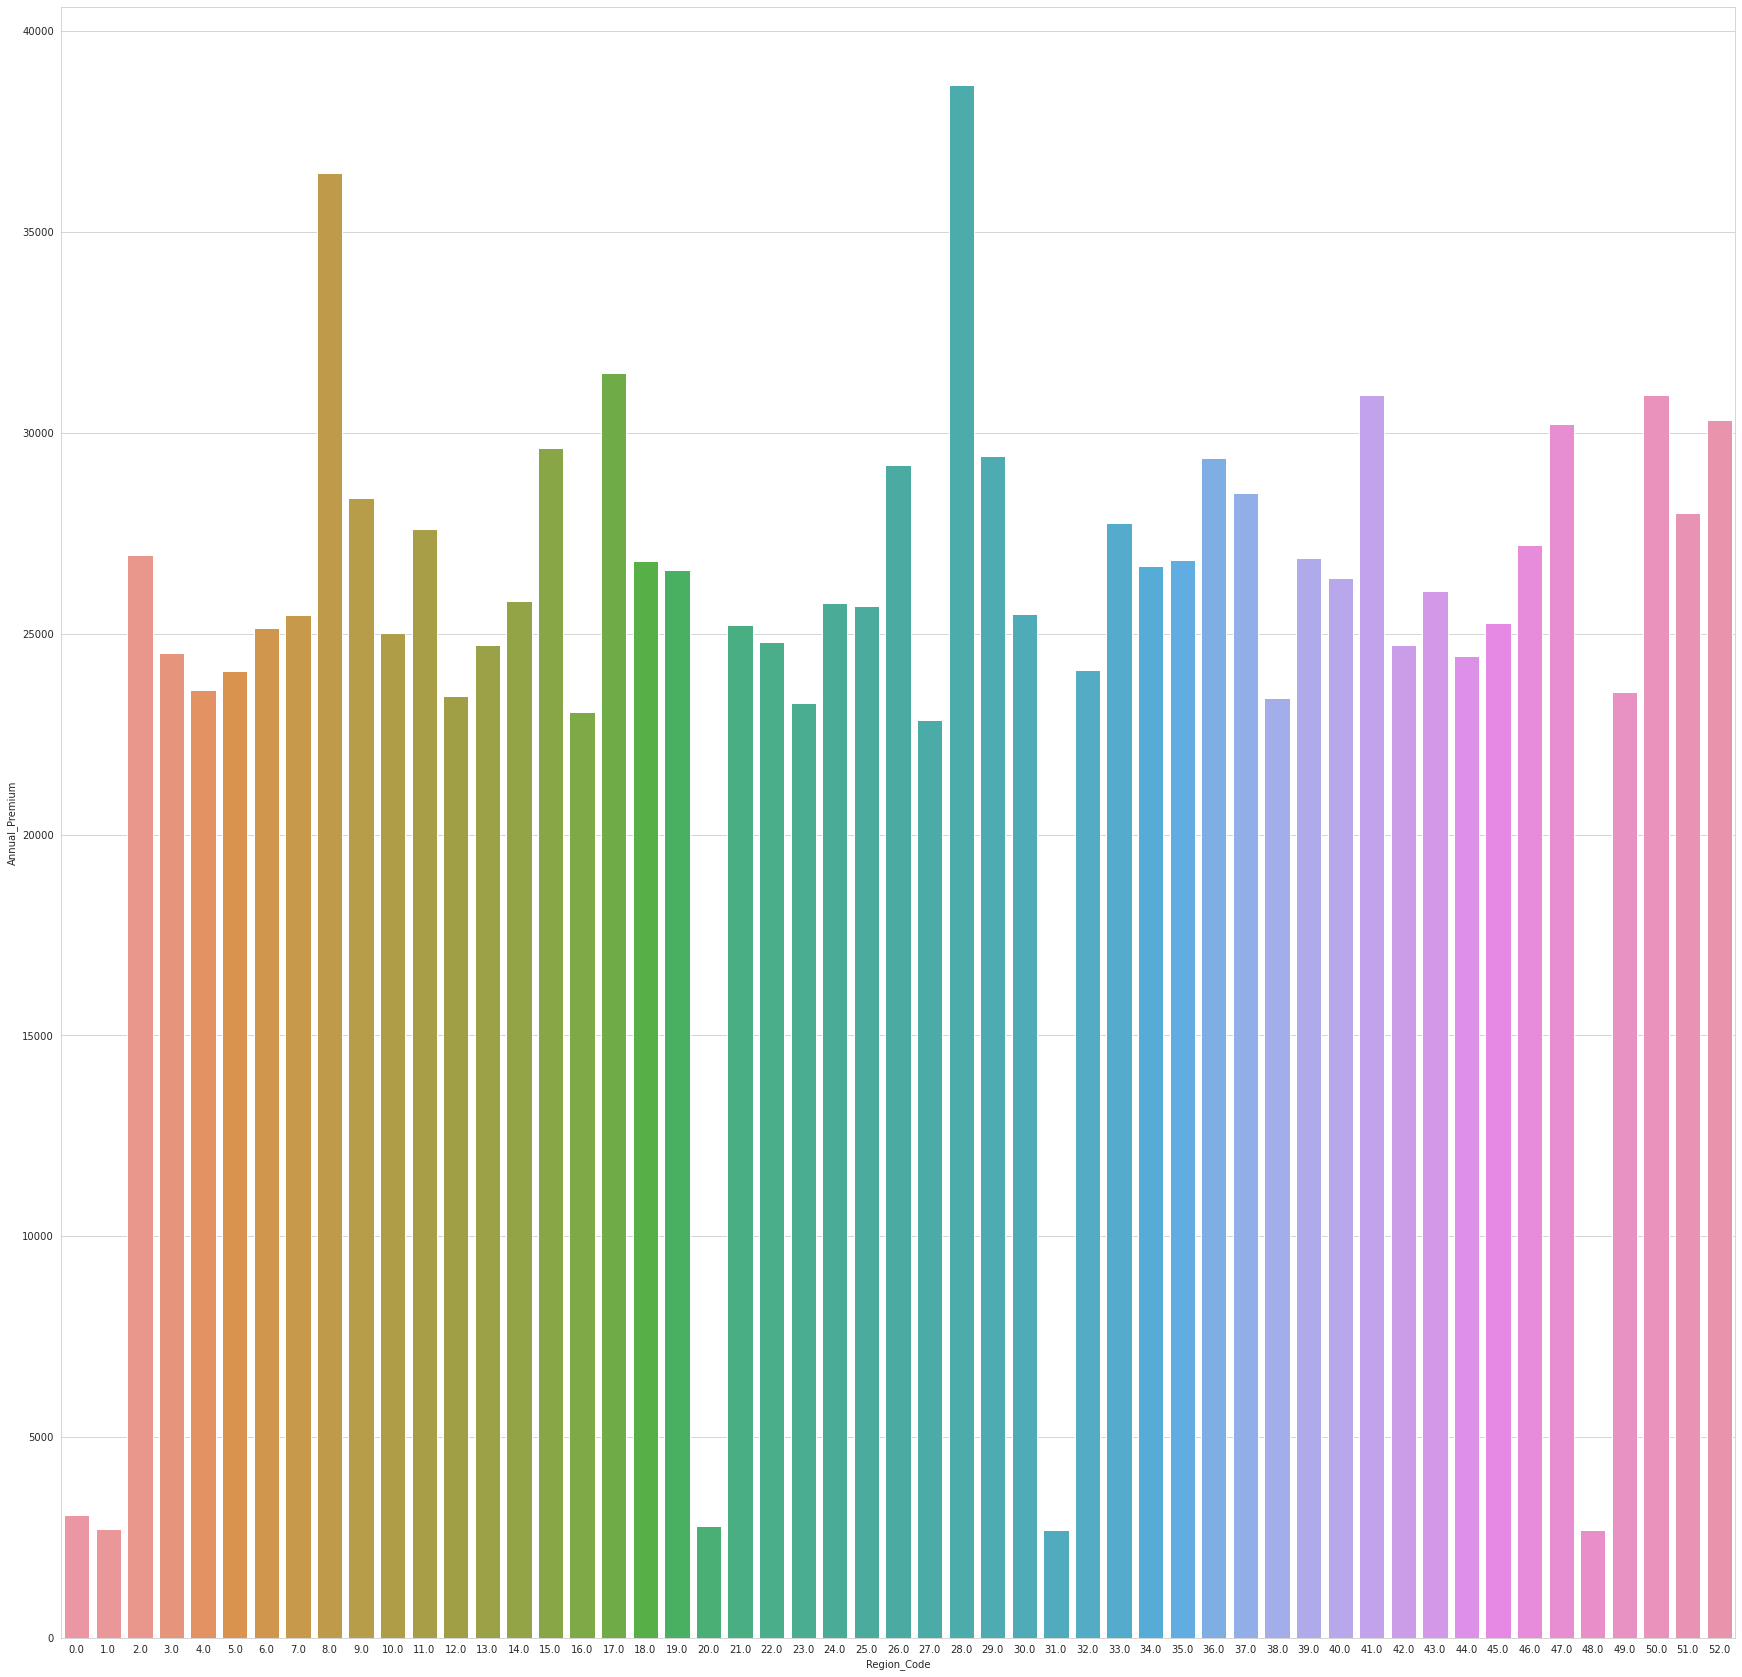

In [ ]:
plt.figure(figsize=(30,30))
sns.barplot(data=grouped_mean,x='Region_Code',y='Annual_Premium')

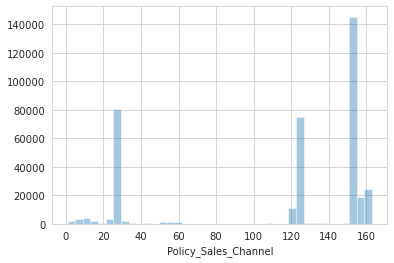

In [ ]:
sns.distplot(data['Policy_Sales_Channel'].dropna(),kde=False,bins=40)

In [ ]:
items_counts = data['Policy_Sales_Channel'].value_counts()
max_item = items_counts.idxmax()
print(max_item)

152.0


In [ ]:
df_task2=data.loc[:,['Response','Vintage']]

In [ ]:
grouped2_df=df_task2.groupby('Response')

In [ ]:
grouped2_df.head()

,Response,Vintage
0,1,217
1,0,183
2,1,27
3,0,203
4,0,39
5,0,176
6,0,249
7,1,72
10,1,46
15,1,147


In [ ]:
grouped2_mean=grouped2_df.mean()
grouped2_mean=grouped2_mean.reset_index()

In [ ]:
grouped2_mean.sort_values('Vintage',axis=0,na_position='last',inplace=True,ascending=False)

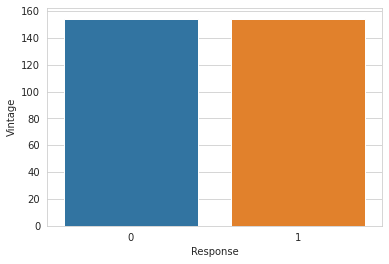

In [ ]:
sns.barplot(data=grouped2_mean,x='Response',y='Vintage')

In [ ]:
print(grouped2_mean)

   Response     Vintage
0         0  154.380243
1         1  154.112246


In [ ]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
data.drop('id',axis=1,inplace=True)

In [ ]:
gender=pd.get_dummies(data['Gender'],drop_first=True)

In [ ]:
vehicle_age=pd.get_dummies(data['Vehicle_Age'],drop_first=True)

In [ ]:
vehicle_damage=pd.get_dummies(data['Vehicle_Damage'],drop_first=True)

In [ ]:
data= pd.concat([data,gender,vehicle_age,vehicle_damage],axis=1)

In [ ]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Male,< 1 Year,> 2 Years,Yes
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,1,0,1,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1,0,0,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1,0,1,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,1,1,0,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0,1,0,0


In [ ]:
data.drop(['Gender','Vehicle_Age','Vehicle_Damage'],axis=1,inplace=True)

In [ ]:
data.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Male,< 1 Year,> 2 Years,Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0


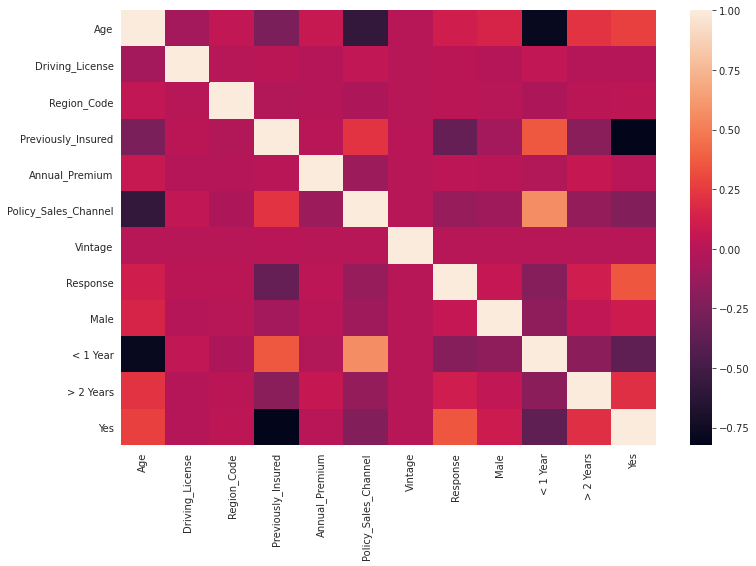

In [ ]:
plt.subplots(figsize=(12,8))
sns.heatmap(data.corr())

<Figure size 3600x3600 with 0 Axes>

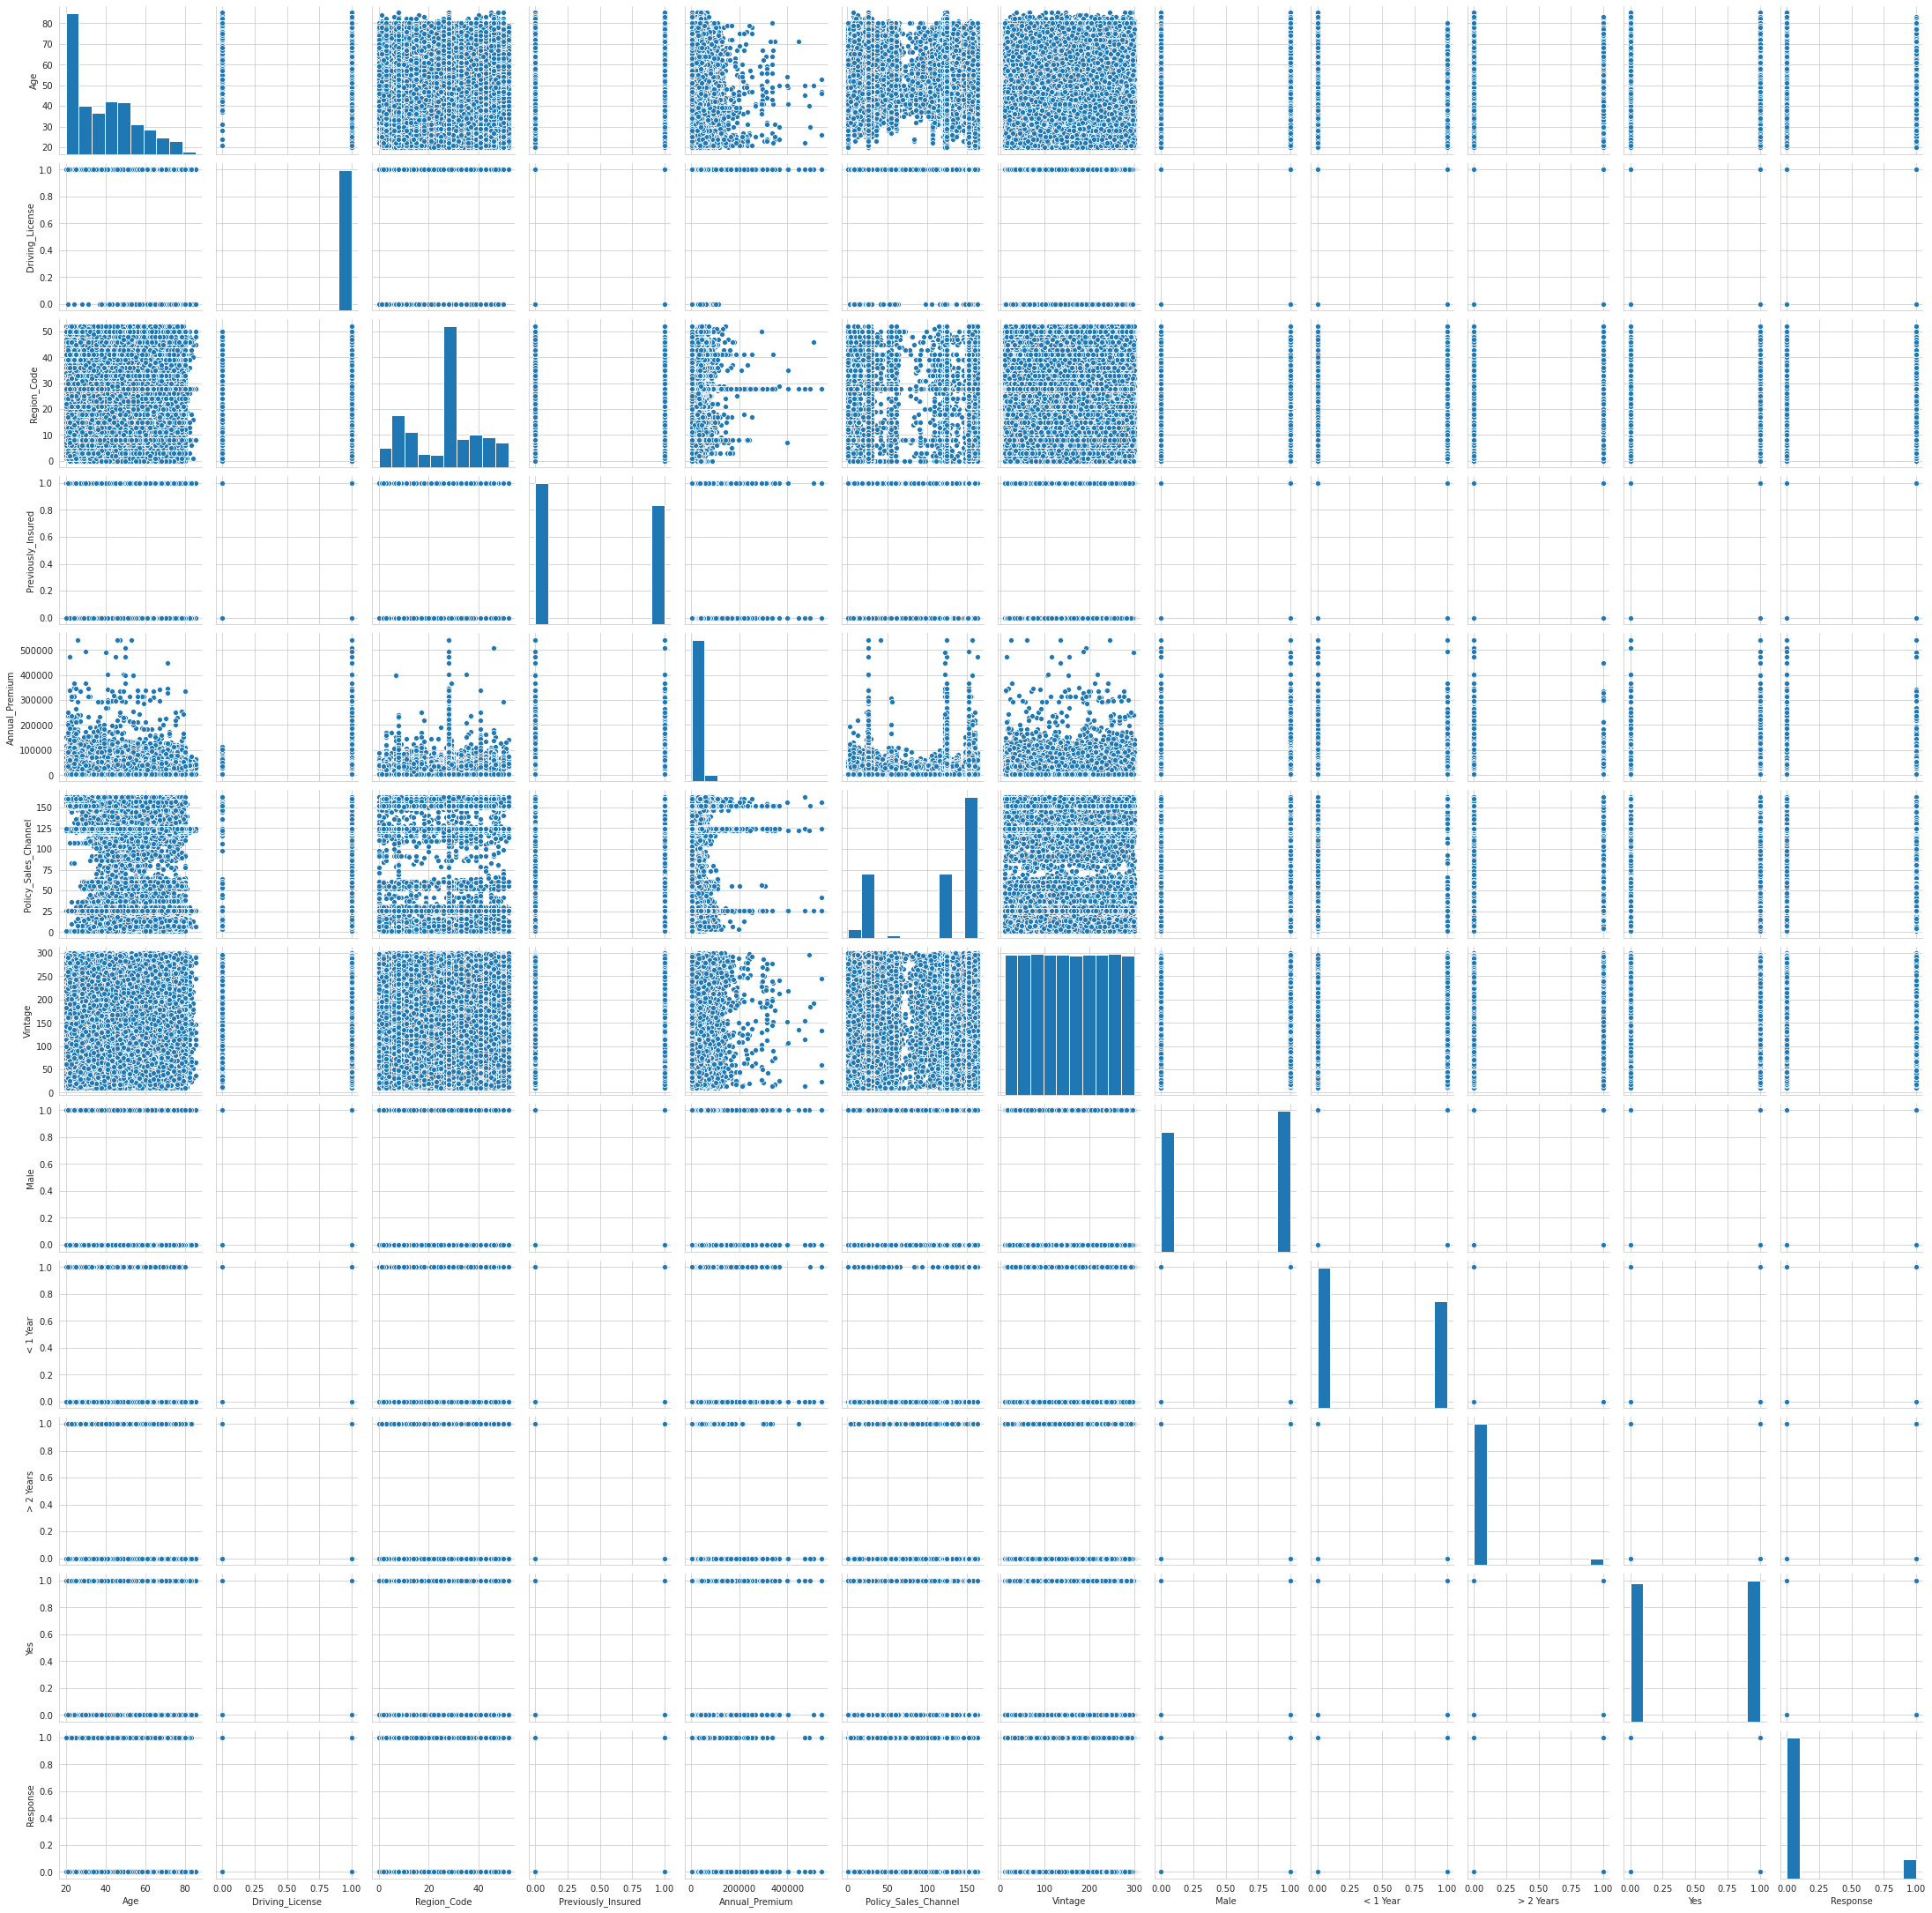

In [ ]:
sns.pairplot(data, vars = ['Age','Driving_License','Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage','Male','< 1 Year','> 2 Years','Yes','Response'])